In [1]:
!nvidia-smi

Sat Jun 24 15:32:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [3]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

import gradio
import gradio as gr

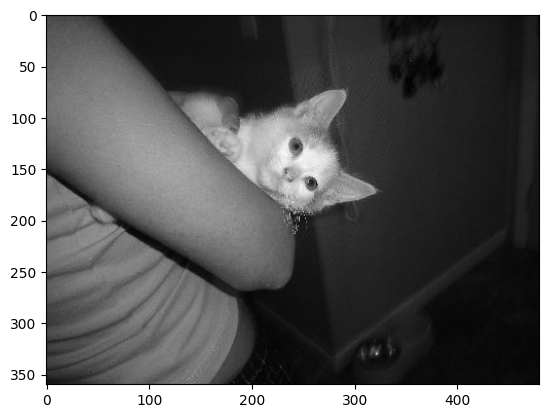

[[73 68 66 ... 25 21 18]
 [72 68 67 ... 25 21 18]
 [71 69 68 ... 26 21 18]
 ...
 [20 20 21 ... 10 11 11]
 [20 20 21 ... 11 11 11]
 [22 22 23 ...  9  8  7]]


In [4]:
DATADIR = '/content/drive/MyDrive/ML_Data/PetImages'

CATEGORIES = ["Cat", "Dog"]
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

print(img_array)

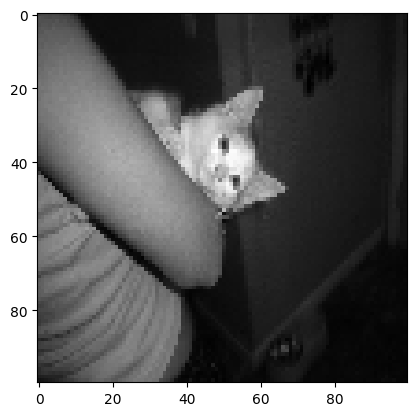

The image shape is (100, 100)


In [5]:
#resize image
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

#show image shape
print('The image shape is {}'.format(new_array.shape))

In [6]:
#create create array of data
data = []

def create_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)    #path to cats or dogs dir
        class_num = CATEGORIES.index(category)    #assign class label

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

                data.append([new_array, class_num])
            except Exception as e:
                pass
create_data()
print('There are {} total images'.format(len(data)))

There are 3856 total images


In [7]:
#randomly shuffle the images
random.shuffle(data)

#separate features and labels
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

#neural network takes in a numpy array as the features and labels so convert from list to array and change shape
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

The image shape is (100, 100, 1)


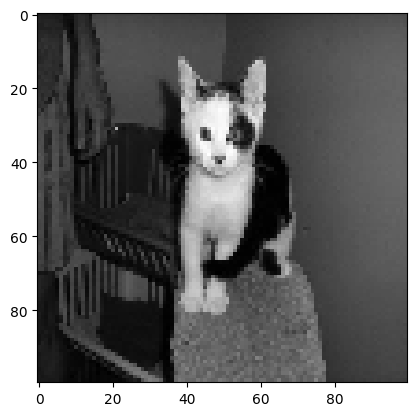

In [8]:
first_feature = X[0]
plt.imshow(first_feature, cmap = 'gray')
print('The image shape is {}'.format(first_feature.shape))

In [9]:
#show shape; (count of images, rows, columns, dimension (1D because grayscale image))
X.shape
#normalize images
X = X/255.0

In [10]:
#separate training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('the shape of training features is {}'.format(X_train.shape))
print('the shape of training labels is {}'.format(y_train.shape))

print('the shape of test features is {}'.format(X_test.shape))
print('the shape of test labels is {}'.format(y_test.shape))

the shape of training features is (2699, 100, 100, 1)
the shape of training labels is (2699,)
the shape of test features is (1157, 100, 100, 1)
the shape of test labels is (1157,)


In [11]:
#create model
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))

#output layer
model.add(Dense(2, activation = 'softmax'))

In [12]:
#compile the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [13]:
#fit model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
76/76 [==============================] - 14s 29ms/step - loss: 0.6252 - accuracy: 0.6805 - val_loss: 0.6275 - val_accuracy: 0.7630
Epoch 2/10
76/76 [==============================] - 2s 22ms/step - loss: 0.6214 - accuracy: 0.6859 - val_loss: 0.5512 - val_accuracy: 0.7630
Epoch 3/10
76/76 [==============================] - 2s 21ms/step - loss: 0.5974 - accuracy: 0.6859 - val_loss: 0.5455 - val_accuracy: 0.7630
Epoch 4/10
76/76 [==============================] - 2s 22ms/step - loss: 0.5677 - accuracy: 0.6859 - val_loss: 0.5991 - val_accuracy: 0.7630
Epoch 5/10
76/76 [==============================] - 2s 20ms/step - loss: 0.5371 - accuracy: 0.7052 - val_loss: 0.5199 - val_accuracy: 0.7630
Epoch 6/10
76/76 [==============================] - 2s 20ms/step - loss: 0.5056 - accuracy: 0.7431 - val_loss: 0.5077 - val_accuracy: 0.7481
Epoch 7/10
76/76 [==============================] - 1s 20ms/step - loss: 0.4658 - accuracy: 0.7649 - val_loss: 0.4731 - val_accuracy: 0.7704
Epoch 8/10
7

In [14]:
hist = history.history

In [15]:
#save model
model.save(os.path.abspath(os.getcwd()))

#save history
np.save('my_history.npy',hist)

In [16]:
#load model
model = keras.models.load_model(os.path.abspath(os.getcwd()))

#load history
hist=np.load('my_history.npy',allow_pickle='TRUE').item()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 64)        0

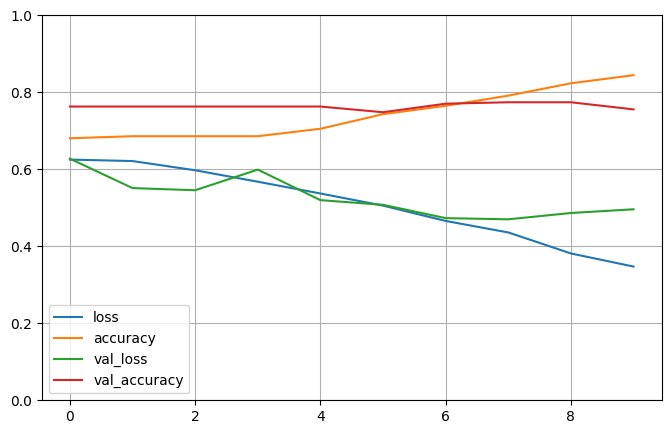

In [18]:
#show learning curves
#mean training loss and accuracy measured over each epoch
#mean validation loss and accuracy measured at the end of each epoch

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [19]:
#use the model to make predictions on test data
y_proba = model.predict(X_test)
y_proba.round(2)

37/37 [==============================] - 1s 13ms/step


array([[0.  , 1.  ],
       [0.17, 0.83],
       [0.24, 0.76],
       ...,
       [0.52, 0.48],
       [0.46, 0.54],
       [0.  , 1.  ]], dtype=float32)

In [20]:
#create a function to make predictions
#return a dictionary of labels and probabilities
def cat_or_dog(img):
    img = img.reshape(1, 100, 100, 1)
    prediction = model.predict(img).tolist()[0]
    class_names = ["Dog", "Cat"]
    return {class_names[i]: prediction[i] for i in range(2)}

#set the user uploaded image as the input array
#match same shape as the input shape in the model
im = gradio.inputs.Image(shape=(100, 100), image_mode='L', invert_colors=False, source="upload")

#setup the interface
iface = gr.Interface(
    fn = cat_or_dog,
    inputs = im,
    outputs = gradio.outputs.Label(),
)
iface.launch(share=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://160b2efad8c308a494.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
